In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(style="whitegrid",palette='muted',color_codes=True)

In [ ]:
df1=pd.read_csv("/content/Product_animals.csv")

In [ ]:
df1.head()

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2016-17,2017-18,2018-19,2019-20,Total Production,cattle,buffalo,sheep,goat,Total Animals
0,Andaman and Nicobar Islands,24,20,23,24,26,24,25,26,21,...,16,17,18,19,328,36438,3700,5,64761,104904
1,Andhra Pradesh#,7257,7624,7938,8925,9570,10429,11203,12088,12762,...,12178,13725,15044,15263,177486,4600087,6219499,17626971,5522133,33968690
2,Arunachal Pradesh,48,48,49,32,24,26,28,22,23,...,53,54,55,61,662,339221,6379,7345,159740,512685
3,Assam,739,747,750,752,753,756,790,796,800,...,861,872,882,920,12905,10909239,421715,332100,4315173,15978227
4,Bihar,4743,5060,5451,5783,5934,6124,6517,6643,6845,...,8711,9242,9818,10480,114611,15397980,7719794,213377,12821216,36152367


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = (df1['Total Animals']).to_numpy()
y = (df1['Total Production']).to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s= MinMaxScaler(feature_range=(0,1))

In [ ]:
x_new =s.fit_transform(x.reshape(-1,1))
y_new=s.fit_transform(y.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new,y_new, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()

In [ ]:
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg_model = DecisionTreeRegressor()

In [ ]:
reg_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
reg_model.score(X_train,y_train)

1.0

In [ ]:
prediction = reg_model.predict(X_test)

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuning_model=GridSearchCV(reg_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [ ]:
from datetime import datetime

start_time=timer(None)

tuning_model.fit(x.reshape(x.shape[0],1),y.reshape(y.shape[0],1))

timer(start_time)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-3818616485.520 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-15634365132.573 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-4941750218.685 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-3818616485.520 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-11140413274.121 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_sa

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fract

In [ ]:
tuning_model.best_params_

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth= 3,
 max_features= 'log2',
 max_leaf_nodes= 70,
 min_samples_leaf= 3,
 min_weight_fraction_leaf= 0.1,
 splitter= 'random')

In [ ]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2', max_leaf_nodes=70,
                      min_samples_leaf=3, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [ ]:
tuned_pred=tuned_hyper_model.predict(X_test)

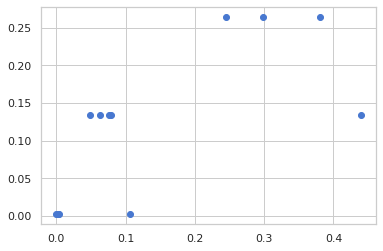

In [ ]:
plt.scatter(y_test,tuned_pred)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.07093208008537129
MSE: 0.011487608542828575
RMSE: 0.10718026190875153


In [ ]:
y_pred = tuned_hyper_model.predict(X_test) 